# Background

## Fourier Transforms

Fourier Transforms are used for signal analysis to switch between the time-domain and the frequency-domain without the loss of any information. It's a useful tool for researchers to identify patterns within a signal that wouldn't show within the time-domain. The Fourier transform of a function is solve using this formula:

$$
\hat{f}(\omega) = \mathcal{F}\{f(t)\}
= \int_{-\infty}^{\infty} f(t)\, e^{-i\omega t}\, dt
$$

This formula takes a time-dependent function $ f(t) $, and separates it into the periodic functions that are contained in $ \hat{f}(\omega) $. The inverse Fourier transform can be done using the formula:

$$
f(t) = \mathcal{F}^{-1}\{\hat{f}(\omega)\}
= \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega)\, e^{i\omega t}\, d\omega
$$

Another use of Fourier transforms is splitting the signal into real and complex components to analyze on their own and analyze the voltage and power spectrum of a signal. The voltage spectrum is obtained when taking the Fourier transform of a voltage signal, while the power spectrum is obtained by taking the squared absolute magnitude of the voltage spectrum. One thing to point out regarding power spectra, you lose the ability to identify the real and imaginary parts of the signal since you took the squared absolute magnitude. 

These Fourier transforms are for information that is infinitely large, which is not what we have. Because of this, we have to use the discrete version of the Fourier transform and its inverse.

## Aliasing

Aliasing occurs in your data when a measured signal is sampled too slowly. To put it in perspective, for a given sampling rate $f_s$, you will not be able to differentiate any measured signal with frequencies of $N f_s \pm \Delta f$, where N is any integer. This is because signal frequencies are effectively "folded" into the range below $f_s/2$, known as Nyquist Zone 1. This phenomenon where frequencies can relate to the sampling rate and overlap at the same measured frequency is known as aliasing.

Even if aliasing is occuring, if the true frequency of a signal is known, the original signal can be reconstructed and no information is lost. However, if the signal contains power at more than one folded frequency, multiple original frequencies collapse into a signal measured frequency. This makes it impossible to determine how much power came from each component, resulting in irreversible lose of information.

## Nyquist Criterion

The Nyquist criterion, given by

$$
\frac{f_{sample}}{2} > f_{signal}
$$

gives us the minimum sampling rate needed to retain the periodic behavior of a signal. When the sampling frequency does not meet the Nyquist criterion, the discrepancy between the signal's actual behavior and sampled data is known as "aliasing."

## Nyquist Zone

<img src="photos/Nyquist_zones.png" style="display: block; margin: auto; width: 50%;">

&nbsp;

For a given sampling frequency $f_s$, the frequency spectrum is divided into regions called Nyquist zones. The boundaries of the Nyquist Zones are calculated using 

$$
Boundary_N = \frac{f_{sample}}{2} * N
$$

where N is any integer. A band-limited signal in a higher Nyquist zone will alias/fold into the first Nyquist zone when sampled. If the signal comes from an odd-numbered Nyquist zone, it appears in the correct frequency order after aliasing. If it comes from an even-numbered zone, the spectrum appears reversed. A good representation is shown above in the figure (Thank you AstroBaki!).

## **Question:** How accurately can we predict aliasing frequencies as the input signal frequency is swept across multiple Nyquist zones?

## Import Packages

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lab1package as lab # personal package
import asyncio
import time
from scipy.stats import kurtosis, skew

In [45]:
# Contents of my Personal Package that I Created

with open(lab.__file__, "r") as f:
    print(f.read())

import numpy as np

def load_array(filename):
    """
    Load arr_0 from an NPZ file and return it.

    Parameters
    ----------
    filename : str
        Path to the .npz file (default: "test_data.npz")

    Returns
    -------
    numpy.ndarray
        Array stored under key 'arr_0'
    """
    with np.load(filename) as data:
        arr = data["arr_0"]
        
    print(filename, "\n", arr)
    
    return arr

def alias_freq(f0,fs):
    return abs(((f0 + fs/2) % fs) - fs/2)

def voltage_spectrum_fft(x, fs):
    x = np.asarray(x).flatten()
    N = len(x)
    x0 = x - np.mean(x) # remove DC
    X = np.fft.fft(x0)
    f = np.fft.fftfreq(N, d=1/fs)
    Xsh = np.fft.fftshift(X)
    fsh = np.fft.fftshift(f)
    
    # voltage magnitude spectrum
    Vsh = np.abs(Xsh)
    V_real = np.real(Xsh)
    V_imag = np.imag(Xsh)
    
    return fsh, Vsh, V_real, V_imag

def power_spectrum_ifft(x, fs):
    x = np.asarray(x).flatten()
    N = len(x)
    x0 = x - np.mean(x) # remove DC
    X = np.

# Nyquist Sampling and Aliasing

## Correlation 5x5 Sampling Rate vs. Signal Frequency

For this 5x5 subplot figure to identify patterns and correlations between sampling rate and signal frequency, 25 data samples were taken: signal frequencies ranging from {100,500} kHz and sampling rate ranging from {1,3} MHz.

In [46]:
# Column 1

arr_1_100 = lab.load_array("data/sr_vs_sf_data/Column1/data_sr_1e6_freq_100.npz")
arr_15_100 = lab.load_array("data/sr_vs_sf_data/Column1/data_sr_1.5e6_freq_100.npz")
arr_2_100 = lab.load_array("data/sr_vs_sf_data/Column1/data_sr_2e6_freq_100.npz")
arr_25_100 = lab.load_array("data/sr_vs_sf_data/Column1/data_sr_2.5e6_freq_100.npz")
arr_3_100 = lab.load_array("data/sr_vs_sf_data/Column1/data_sr_3e6_freq_100.npz")

# Column 2

arr_1_200 = lab.load_array("data/sr_vs_sf_data/Column2/data_sr_1e6_freq_200.npz")
arr_15_200 = lab.load_array("data/sr_vs_sf_data/Column2/data_sr_1.5e6_freq_200.npz")
arr_2_200 = lab.load_array("data/sr_vs_sf_data/Column2/data_sr_2e6_freq_200.npz")
arr_25_200 = lab.load_array("data/sr_vs_sf_data/Column2/data_sr_2.5e6_freq_200.npz")
arr_3_200 = lab.load_array("data/sr_vs_sf_data/Column2/data_sr_3e6_freq_200.npz")

# Column 3

arr_1_300 = lab.load_array("data/sr_vs_sf_data/Column3/data_sr_1e6_freq_300.npz")
arr_15_300 = lab.load_array("data/sr_vs_sf_data/Column3/data_sr_1.5e6_freq_300.npz")
arr_2_300 = lab.load_array("data/sr_vs_sf_data/Column3/data_sr_2e6_freq_300.npz")
arr_25_300 = lab.load_array("data/sr_vs_sf_data/Column3/data_sr_2.5e6_freq_300.npz")
arr_3_300 = lab.load_array("data/sr_vs_sf_data/Column3/data_sr_3e6_freq_300.npz")

# Column 4

arr_1_400 = lab.load_array("data/sr_vs_sf_data/Column4/data_sr_1e6_freq_400.npz")
arr_15_400 = lab.load_array("data/sr_vs_sf_data/Column4/data_sr_1.5e6_freq_400.npz")
arr_2_400 = lab.load_array("data/sr_vs_sf_data/Column4/data_sr_2e6_freq_400.npz")
arr_25_400 = lab.load_array("data/sr_vs_sf_data/Column4/data_sr_2.5e6_freq_400.npz")
arr_3_400 = lab.load_array("data/sr_vs_sf_data/Column4/data_sr_3e6_freq_400.npz")

# Column 5

arr_1_500 = lab.load_array("data/sr_vs_sf_data/Column5/data_sr_1e6_freq_500.npz")
arr_15_500 = lab.load_array("data/sr_vs_sf_data/Column5/data_sr_1.5e6_freq_500.npz")
arr_2_500 = lab.load_array("data/sr_vs_sf_data/Column5/data_sr_2e6_freq_500.npz")
arr_25_500 = lab.load_array("data/sr_vs_sf_data/Column5/data_sr_2.5e6_freq_500.npz")
arr_3_500 = lab.load_array("data/sr_vs_sf_data/Column5/data_sr_3e6_freq_500.npz")

data/sr_vs_sf_data/Column1/data_sr_1e6_freq_100.npz 
 [[ -1   0  -1 ... -69 -19  40]
 [ 85  93  67 ... -78 -91 -70]]
data/sr_vs_sf_data/Column1/data_sr_1.5e6_freq_100.npz 
 [[ -1  -1  -1 ... -73 -43  -5]
 [ 35  70  92 ...  57  22 -16]]
data/sr_vs_sf_data/Column1/data_sr_2e6_freq_100.npz 
 [[ -1  -1  -1 ...  63  84  96]
 [ 97  87  71 ...  -8 -36 -61]]
data/sr_vs_sf_data/Column1/data_sr_2.5e6_freq_100.npz 
 [[ -1   0  -1 ...   5 -18 -43]
 [-46 -76 -66 ...  46  14   2]]
data/sr_vs_sf_data/Column1/data_sr_3e6_freq_100.npz 
 [[ -1  -1   0 ... -25 -18 -10]
 [ -3   5  14 ... -11  -3   4]]
data/sr_vs_sf_data/Column2/data_sr_1e6_freq_200.npz 
 [[  -1    0   -1 ...  127  126  -43]
 [-128  -50  127 ... -128  -52  127]]
data/sr_vs_sf_data/Column2/data_sr_1.5e6_freq_200.npz 
 [[  -1   -1   -1 ... -117    7  124]
 [ 127   86  -36 ...  -59   73  127]]
data/sr_vs_sf_data/Column2/data_sr_2e6_freq_200.npz 
 [[   0   -1    0 ...   67  127  127]
 [ 115   33  -61 ... -121  -34   66]]
data/sr_vs_sf_data/Col

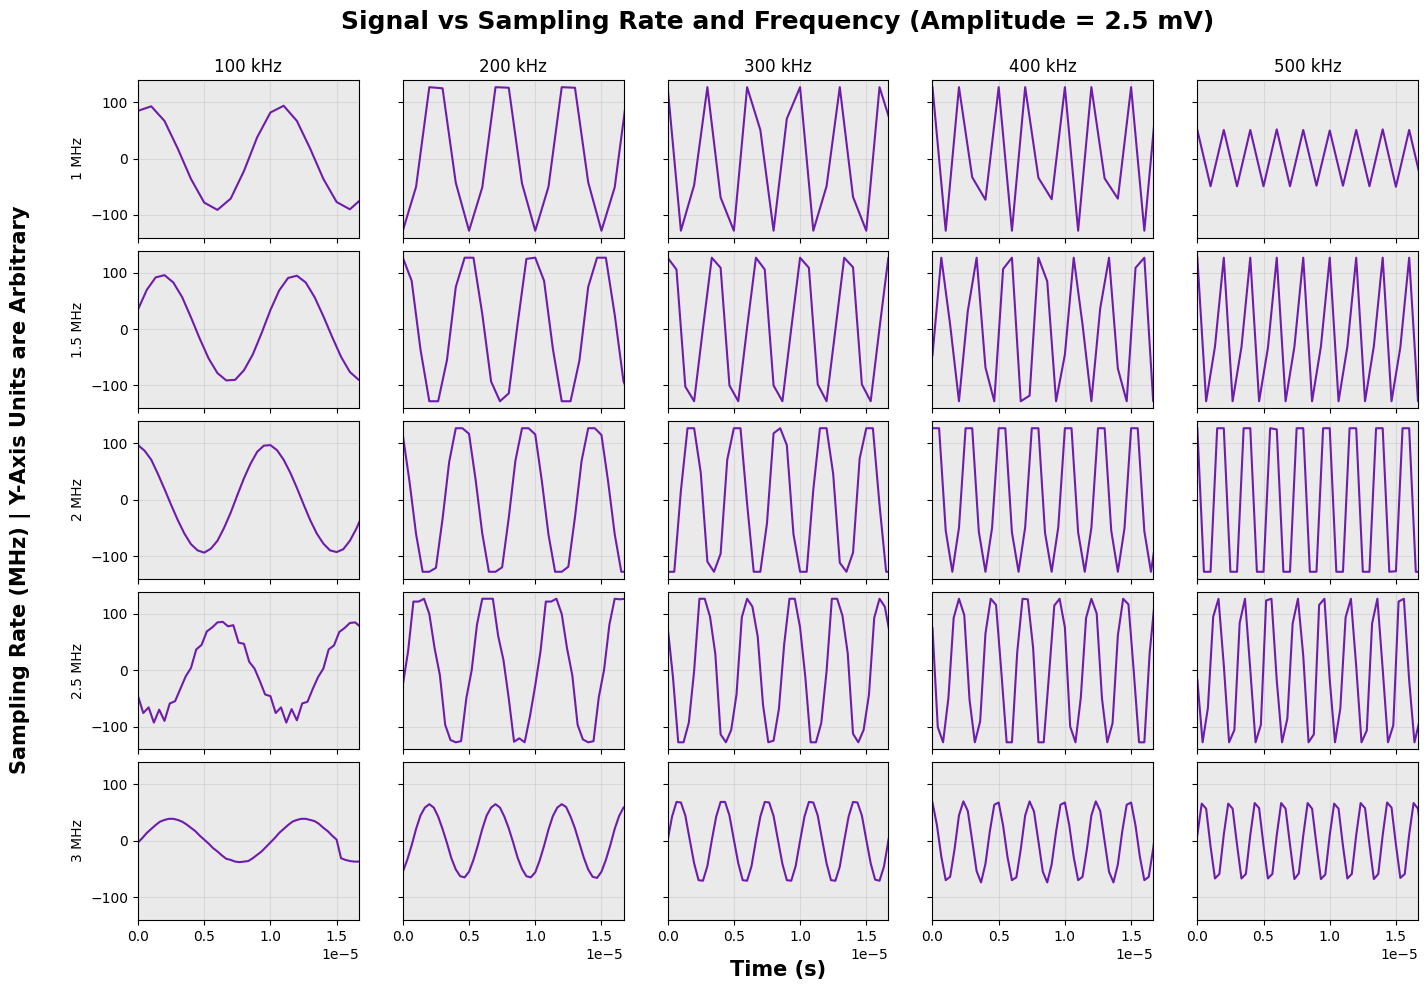

In [47]:
# 5x5 

frequencies = [100, 200, 300, 400, 500]  # kHz
sampling_rates = [1, 1.5, 2, 2.5, 3]     # MHz

data = [
    [arr_1_100,  arr_1_200,  arr_1_300,  arr_1_400,  arr_1_500],
    [arr_15_100, arr_15_200, arr_15_300, arr_15_400, arr_15_500],
    [arr_2_100,  arr_2_200,  arr_2_300,  arr_2_400,  arr_2_500],
    [arr_25_100, arr_25_200, arr_25_300, arr_25_400, arr_25_500],
    [arr_3_100,  arr_3_200,  arr_3_300,  arr_3_400,  arr_3_500],
]

fig, axs = plt.subplots(5, 5, figsize=(16, 10), sharex=True, sharey=True)

for i in range(5):          # rows = sampling rate
    fs = sampling_rates[i] * 1e6  # Hz

    for j in range(5):      # cols = frequency
        y = data[i][j][1]
        N = len(y)
        t = np.arange(N) / fs  # time axis

        axs[i, j].plot(t, y, color="#6E1CAD")
        axs[i, j].set_xlim(0, 50 / fs)  # same as original 50 samples, now in time

        if i == 0:
            axs[i, j].set_title(f"{frequencies[j]} kHz")

        if j == 0:
            axs[i, j].set_ylabel(f"{sampling_rates[i]} MHz")

        axs[i, j].set_facecolor("#EAEAEA")
        axs[i, j].grid(True, alpha=0.3)


fig.supxlabel("Time (s)", weight='semibold', fontsize=15)
fig.supylabel("Sampling Rate (MHz) | Y-Axis Units are Arbitrary", weight='semibold', fontsize=15)
fig.suptitle("Signal vs Sampling Rate and Frequency (Amplitude = 2.5 mV)",
             weight='semibold', fontsize=18)

plt.subplots_adjust(top=0.91, hspace=0.08, left=0.1, bottom=0.07)
plt.savefig("figures/5x5_phase_shift_grid.png", dpi=300)
plt.show()


**Figure 1**: 5x5 signal frequency vs sampling rate plot on time-domain waveforms for signal frequencies up to 500 kHz and sampling rates between 1–3 MHz. Since the Nyquist criterion $(\frac{f_{s}}{2} > f_{signal})$ is satisfied, no aliasing is observed. The top-right graph $f_{signal}=500$ kHz and $f_s=1$ MHz) it is at the Nyquist border, so it technically is aliasing but practically is not safe to conduct any data analysis on. This is also sometimes called critical aliasing.

From this figure, we can observe the effect of sampling density on the time-domain sinusoidal signal when the Nyquist criterion is satisfied. As the ratio $f_{signal}/f_s$ increases, we acquire few samples per oscillation, which results in waveforms that can appear jagged and more sensitive to sampling phase change. However, the actual signal frequency remains relatively correct and no aliasing occurs.

## Time-Domain Representation of Aliased Signals Across Nyquist Zones

To identify patterns and examine how aliasing looks across multiple Nyquist zones, twelve datasets were collected: three distinct signal frequencies sampled within each of four Nyquist zones.

In [48]:
# Zone 1

arr_z0_150 = lab.load_array("data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_150kHz.npz")
arr_z0_250 = lab.load_array("data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_250kHz.npz")
arr_z0_350 = lab.load_array("data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_350kHz.npz")

# Zone 2

arr_z1_650 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z1/Z1_650kHz_10mHz.npz")
arr_z1_750 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z1/Z1_750kHz_10mHz.npz")
arr_z1_850 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z1/Z1_850kHz_10mHz.npz")

# Zone 3

arr_z2_1150 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z2/Z2_1150kHz_10mHz.npz")
arr_z2_1250 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z2/Z2_1250kHz_10mHz.npz")
arr_z2_1350 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z2/Z2_1350kHz_10mHz.npz")

# Zone 4

arr_z3_1650 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z3/Z3_1650kHz_10mHz.npz")
arr_z3_1750 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z3/Z3_1750kHz_10mHz.npz")
arr_z3_1850 = lab.load_array("data/aliasing_across_nyquist_data/Zone_10mHz/Z3/Z3_1850kHz_10mHz.npz")

data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_150kHz.npz 
 [[  -1   -1   -1 ...  -67 -108  -63]
 [  36   97   74 ... -103  -33   63]]
data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_250kHz.npz 
 [[  -1   -1   -1 ... -128  -22  127]
 [  12 -128  -20 ... -128  -21  127]]
data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_350kHz.npz 
 [[  -1    0    0 ...  -30  127 -128]
 [  18  103 -128 ... -128  101   22]]
data/aliasing_across_nyquist_data/Zone_10mHz/Z1/Z1_650kHz_10mHz.npz 
 [[  2   3  -4 ... -18 -13 -11]
 [-23 -18 -20 ...  -6 -19  -8]
 [-13 -19 -12 ... -14 -10 -16]
 ...
 [-13 -19 -11 ... -14 -11 -16]
 [ -5 -18 -14 ... -17 -20 -19]
 [-13  -7 -20 ... -21 -11 -25]]
data/aliasing_across_nyquist_data/Zone_10mHz/Z1/Z1_750kHz_10mHz.npz 
 [[ -1  -3  -2 ...  -1 -11 -25]
 [-22  -2 -10 ...  -3 -11 -25]
 [-21  -3 -12 ...  -3 -13 -25]
 ...
 [-19  -4 -13 ...  -4 -14 -25]
 [-19  -4 -14 ...  -3 -12 -24]
 [-21  -3 -12 ...  -4 -14 -26]]
data/aliasing_across_nyquist_data/Zone_10mHz/Z1/Z1_850kH

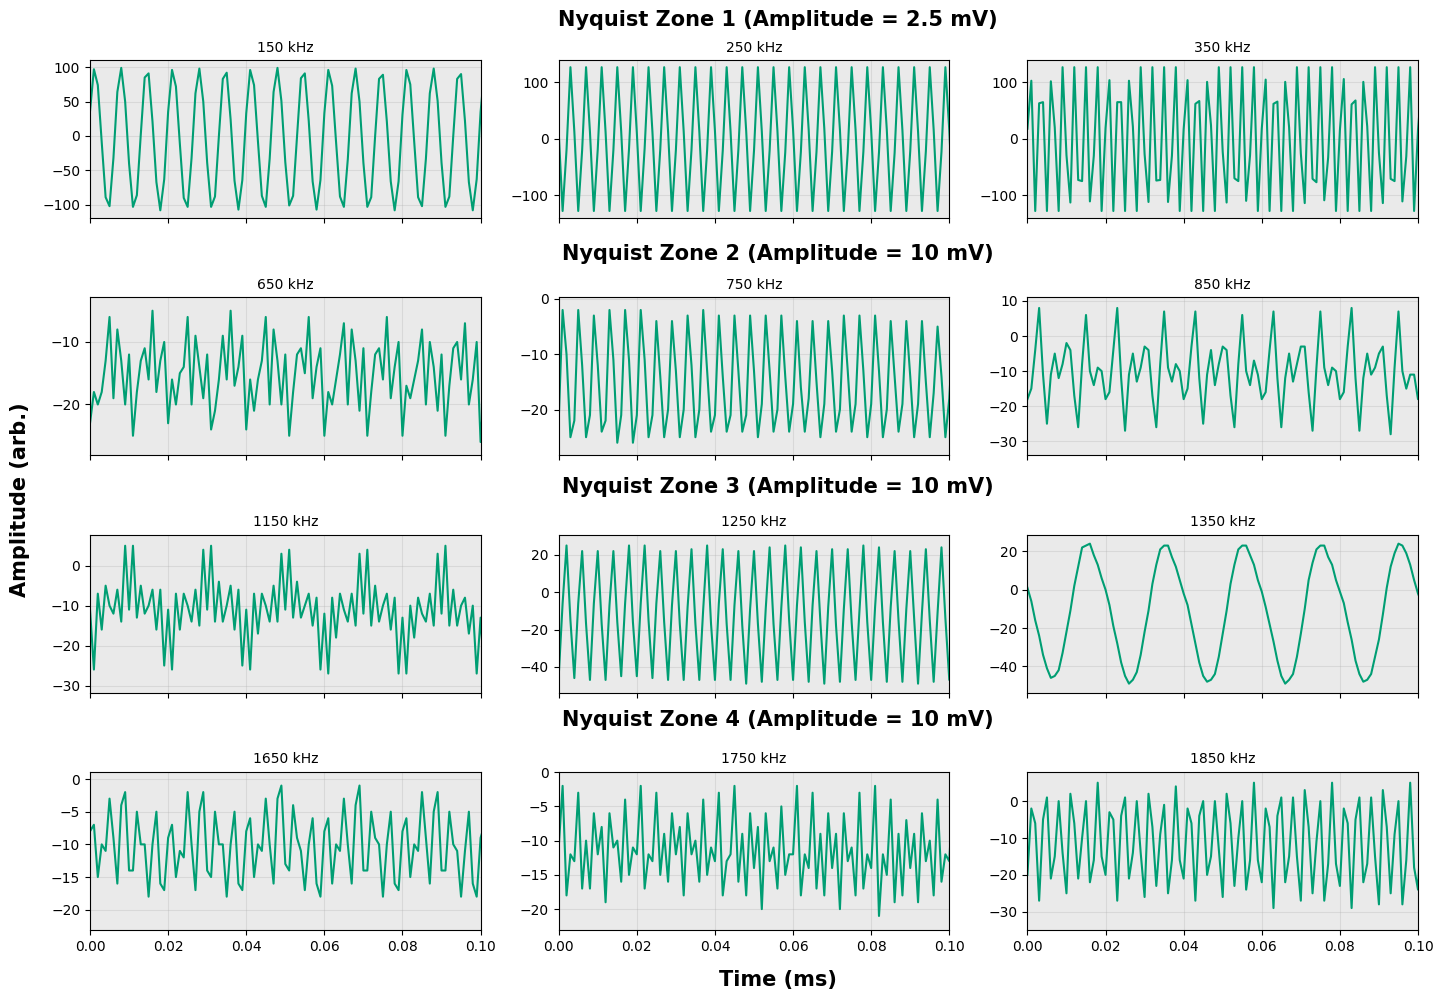

In [49]:
# DC Offset for Negative Values
# Retake data fo0r 750,1250,1350,1850 (more blocks)

fs = 1e6

data_arrays = [
    arr_z0_150[1], arr_z0_250[1], arr_z0_350[1],
    arr_z1_650[1], arr_z1_750[1], arr_z1_850[1],
    arr_z2_1150[1], arr_z2_1250[1], arr_z2_1350[1],
    arr_z3_1650[1], arr_z3_1750[1], arr_z3_1850[1]
]

titles = [
    "150 kHz", "250 kHz", "350 kHz",
    "650 kHz", "750 kHz", "850 kHz",
    "1150 kHz", "1250 kHz", "1350 kHz",
    "1650 kHz", "1750 kHz", "1850 kHz"
]

fig, axes = plt.subplots(4, 3, figsize=(16, 10), sharex=True)
axes = axes.flatten()


for i, ax in enumerate(axes):
    y = data_arrays[i]
    x = np.arange(len(y)) / fs   # time in seconds
    x_ms = np.array(x) * 1e3
    
    ax.plot(x_ms, y, color="#009E73")
    ax.set_title(titles[i], fontsize=10)
    ax.set_xlim(0,0.1)
    ax.set_facecolor("#EAEAEA")
    ax.grid(True, alpha=0.3)

row_titles = ["Nyquist Zone 1 (Amplitude = 2.5 mV)", "Nyquist Zone 2 (Amplitude = 10 mV)",
              "Nyquist Zone 3 (Amplitude = 10 mV)", "Nyquist Zone 4 (Amplitude = 10 mV)"]

for i, row_title in enumerate(row_titles):
    fig.text(0.5, 0.98 - i*0.2335, row_title,
             ha='center', va='center', fontsize=15, weight='semibold')

plt.subplots_adjust(top=0.94, hspace=0.5, left = 0.07, bottom=0.07)
fig.supxlabel("Time (ms)", fontsize=15, weight='semibold')
fig.supylabel("Amplitude (arb.)", fontsize=15, weight='semibold')
plt.savefig("figures/3x4_Nyquist_Zones_png", dpi=300)
plt.show()

**Figure 2**: 3 different frequencies plotted in the time-domain within the first 4 Nyquist Zones at a fixed sampling rate of 1 MHz. These waveforms were taken with the internal filters in the SDR being overridden using **fir_coeffs = np.array$([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2047])$**. In Nyquist Zone 1, no aliasing occurs and the signal is well-resolved with a smooth sinusoidal waveform. As the signal frequency increases and gets into higher Nyquist zones, fewer samples are taken per oscillation. This results in the sampled waveform becoming more sensitive to the phase between the signal and sampling clock. Even though the time-domain shape changes with each graph, the sampled signal follows aliasing theory and remains periodic. Since signals from different Nyquist zones can look fairly similar (e.g. $f_{signal}=750$ & $f_{signal}=750$), frequency-domain analysis is needed to accurately identify the aliased frequencies (through Fourier transforms!).

# Voltage and Power Spectra

## Voltage Spectra from Three Nyquist Aliasing Zones

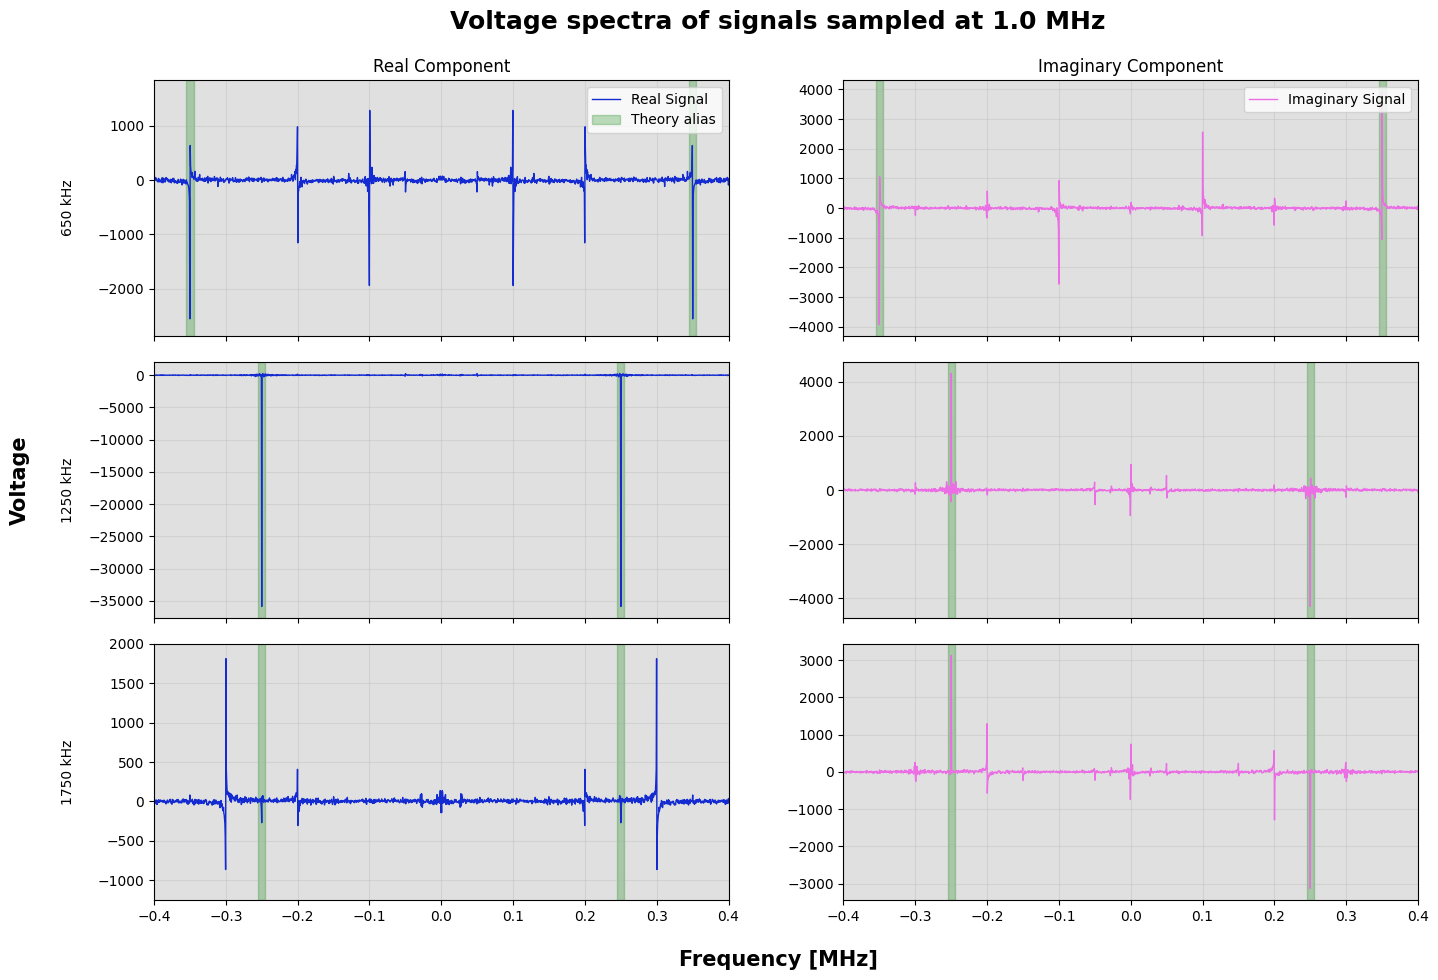

In [50]:
fs = 1e6  # sampling rate (Hz)

cases = [
    ("650 kHz", 0.65e6, arr_z1_650[1]),
    ("1250 kHz", 1.25e6, arr_z2_1250[1]),
    ("1750 kHz", 1.75e6, arr_z3_1750[1]),
]

bg_colors = ["#E0E0E0", "#E0E0E0", "#E0E0E0"]

# plot settings
xlim_mhz = 0.4
band_halfwidth_hz = 5e3

fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharex=True)
fig.suptitle(
    f"Voltage spectra of signals sampled at {fs/1e6:.1f} MHz",
    y=0.97, weight='semibold', fontsize=18
)

for i, ((label, f0, x), bg) in enumerate(zip(cases, bg_colors)):

    ax_r = axes[i, 0]   # real column
    ax_i = axes[i, 1]   # imag column

    ax_r.set_facecolor(bg)
    ax_i.set_facecolor(bg)

    fsh, Vsh, V_real, V_imag = lab.voltage_spectrum_fft(x, fs)
    f_alias = lab.alias_freq(f0, fs)

    # --- Real ---
    ax_r.plot(fsh/1e6, V_real, linewidth=1, color="#132BD1", label="Real Signal")

    # --- Imag ---
    ax_i.plot(fsh/1e6, V_imag, linewidth=1, color="#EB6EE5", label="Imaginary Signal")

    # --- Theory alias bands (both panels) ---
    for ax in (ax_r, ax_i):
        for sgn in [+1, -1]:
            center = sgn * f_alias
            ax.axvspan(
                (center - band_halfwidth_hz)/1e6,
                (center + band_halfwidth_hz)/1e6,
                alpha=0.25,
                color="green",
                label="Theory alias" if (sgn == +1 and ax is ax_r) else None
            )

        ax.grid(True, alpha=0.3)

    # Row label (centered across both columns)
    ax_r.text(
        -0.15, 0.5, label,
        transform=ax_r.transAxes,
        rotation=90,
        ha="center", va="center"
    )

# Column titles
axes[0, 0].set_title("Real Component")
axes[0, 1].set_title("Imaginary Component")

axes[2, 0].set_ylim(-1250, 2000)   # example values (mV)

# Axes formatting
for ax in axes[-1, :]:
    ax.set_xlim(-xlim_mhz, xlim_mhz)

# Single legend
axes[0, 0].legend(loc="upper right")
axes[0, 1].legend(loc="upper right")

fig.supxlabel("Frequency [MHz]", fontsize=15, weight='semibold')
fig.supylabel("Voltage", fontsize=15, weight='semibold')
plt.subplots_adjust(top=0.9, hspace=0.1, left = 0.11, bottom=0.08)
plt.savefig("figures/voltage_spectra", dpi=300)
plt.show()


**Figure 3**: The complex voltage spectra of signals sampled at 1.0 MHz, with the real component plotted in the left column and the imaginary component in the right column for three different input frequencies (650 kHz, 1250 kHz, and 1750 kHz). Unlike power spectra, which rids us of phase information, voltage spectra retains all instantaneous phase information (real and imaginary parts). This information fully describes the complex Fourier transform $X(f)$.

For the real-valued signal, the voltage spectrum exhibits Hermitian symmetry in the sense that it is approximately even in frequency across the y-axis. For the imaginary-valued signal, the voltage spectrum exhibits the same symmetry but odd. We can observe this in the graphs where the positive and negative frequency components are mirrored (with sign changes) across the x-axis when comparing across the y-axis. These sign changes tell us information about the phase of the signal, where negative frequencies correspond to complex exponetials rotating in the opposite direction in the complex plane and vice versa for the positive frequencies.

The shaded regions indicate the **theoretical alias frequencies**, where are given by

$$
f_{\text{alias}}
= \left| \left( f_{signal} + \tfrac{f_s}{2}
- f_s \left\lfloor \frac{f_{signal} + \tfrac{f_s}{2}}{f_s} \right\rfloor \right)
- \tfrac{f_s}{2} \right|
$$

This represents the bandwidth signal that folds back into the first Nyquist zone due to alias sampling. In the voltage spectra, these bandwidth signals show up as sharp features at the designated locations, but with different amplitudes and signs between the real and imaginary components. This is due to the relative phase of the aliased signals and shows us why voltage spectra is needed when analyzing phase relationships to explore symmetry, phase, and harmonic structure in the frequency domain.

Additionally, the voltage spectra show several smaller peaks at other frequencies. These features are consistent with harmonics, which arise from other variables in the signal generator and data collection, such as nonlinearities in the function generator. Due to the nature of Harmonics, they also obey Hermitian symmetry and appear in both the real and imaginary components of the voltage spectra. After sampling, these harmonics also alias into the first Nyquist zone and produce these additional peaks.

## Power Spectra from Three Nyquist Aliasing Zones

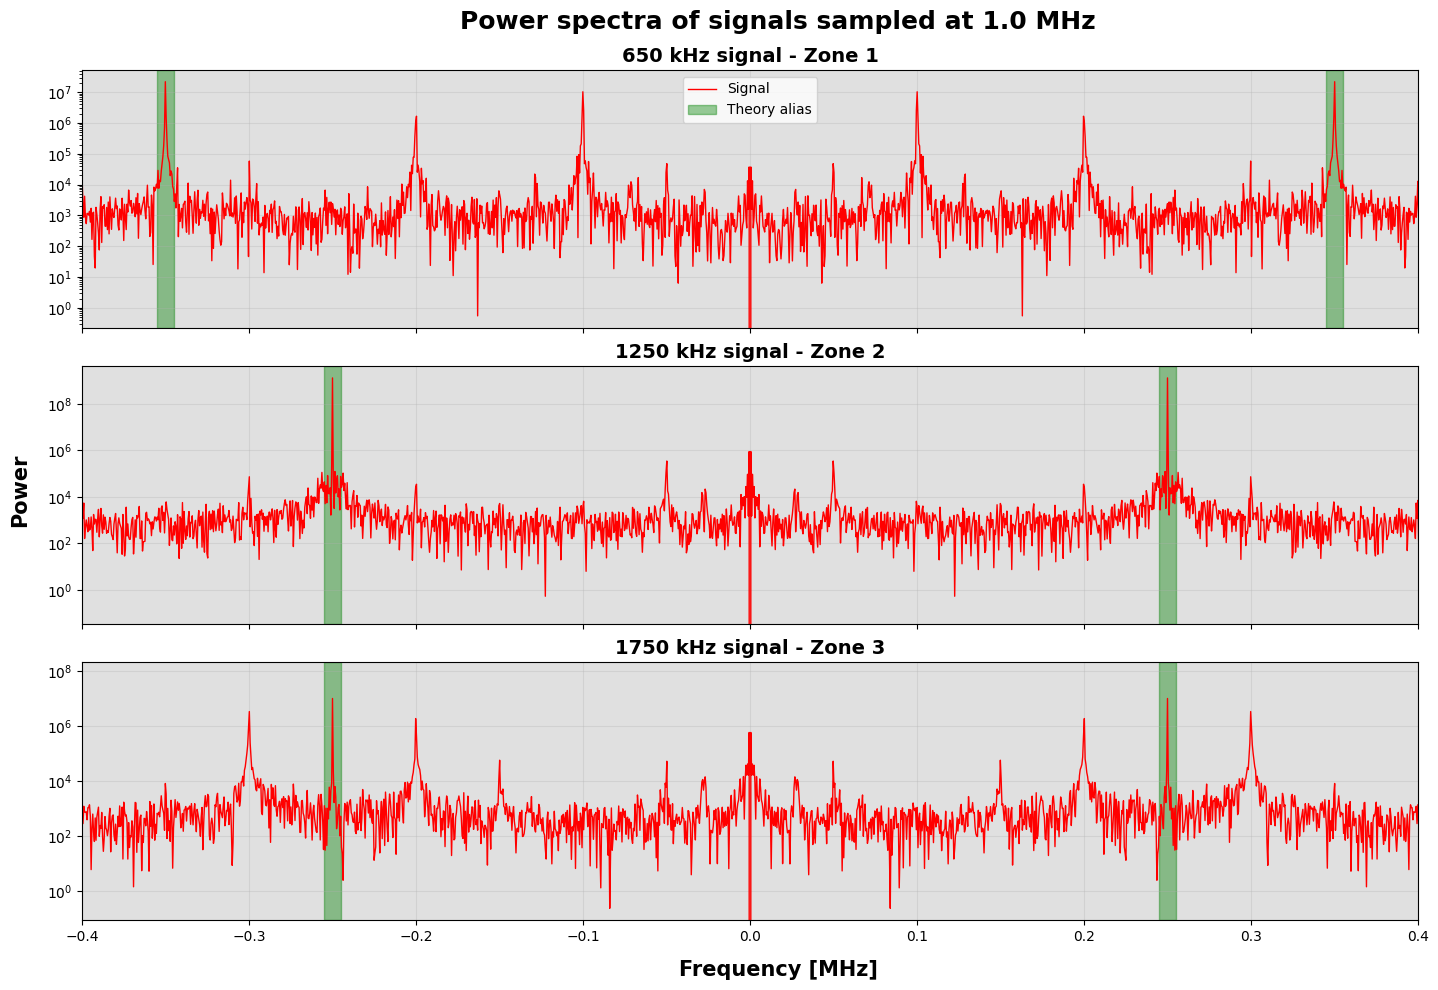

In [52]:
fs = 1e6  # sampling rate (Hz)

cases = [
    ("650 kHz signal - Zone 1", 0.65e6, arr_z1_650[1]),
    ("1250 kHz signal - Zone 2", 1.25e6, arr_z2_1250[1]),
    ("1750 kHz signal - Zone 3", 1.75e6, arr_z3_1750[1]),
]

bg_colors = ["#E0E0E0", "#E0E0E0", "#E0E0E0"]

xlim_mhz = 0.4
band_halfwidth_hz = 5e3

fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
fig.suptitle(
    f"Power spectra of signals sampled at {fs/1e6:.1f} MHz",
    y=0.98, weight="semibold", fontsize=18
)

for ax, (label, f0, x), bg in zip(axes, cases, bg_colors):
    ax.set_facecolor(bg)
    fsh, Psh, _ = lab.power_spectrum_ifft(x, fs)
    f_alias = lab.alias_freq(f0, fs)

    ax.plot(fsh/1e6, Psh, linewidth=1, color="red", label="Signal")

    for sgn in [+1, -1]:
        center = sgn * f_alias
        ax.axvspan(
            (center - band_halfwidth_hz)/1e6,
            (center + band_halfwidth_hz)/1e6,
            alpha=0.4, color="green",
            label="Theory alias" if sgn == +1 else None
        )

    ax.set_title(label, fontsize=14, weight="semibold")
    ax.set_yscale("log")
    ax.grid(True, alpha=0.3)

axes[-1].set_xlim(-xlim_mhz, xlim_mhz)

fig.supxlabel("Frequency [MHz]", weight="semibold", fontsize=15)
fig.supylabel("Power", weight="semibold", fontsize=15)

axes[0].legend(loc="upper center")
plt.subplots_adjust(top=0.92, hspace=0.15, left=0.065, bottom=0.07)
plt.savefig("figures/power_spectra", dpi=300)
plt.show()


**Figure 4**: The power spectra of three sinusoidal signals sampled at 1.0 MHz (650 kHz, 1250 kHz, and 1750 kHz), plotted on a logarithmic scale. In each graph, The shaded regions indicate the theoretical alias frequencies, explained in **Figure 3**. 

The alignment between the measured peaks of the power spectra and the theoretical positions confirms that the power spectrum is well described by Nyquist folding. Since the power spectrum is proportional to $|X(f)|^2$, it can also provide us information on how the measured signal's energy is distributed across frequencies. Additionally, same as the voltage spectra, several smaller peaks are visible at frequencies away from the aliasing frequency. These features are consistent with harmonics, which was also explained in **Figure 3**

## Autocorrelation Function vs. Inverse Power Spectra

In [53]:
array = lab.load_array("data/frequency_data/data_sr_2.2e6_freq_100.npz")

data/frequency_data/data_sr_2.2e6_freq_100.npz 
 [[ -1  -1  -1 ... -93 -92 -86]
 [-72 -53 -29 ... -86 -73 -55]]


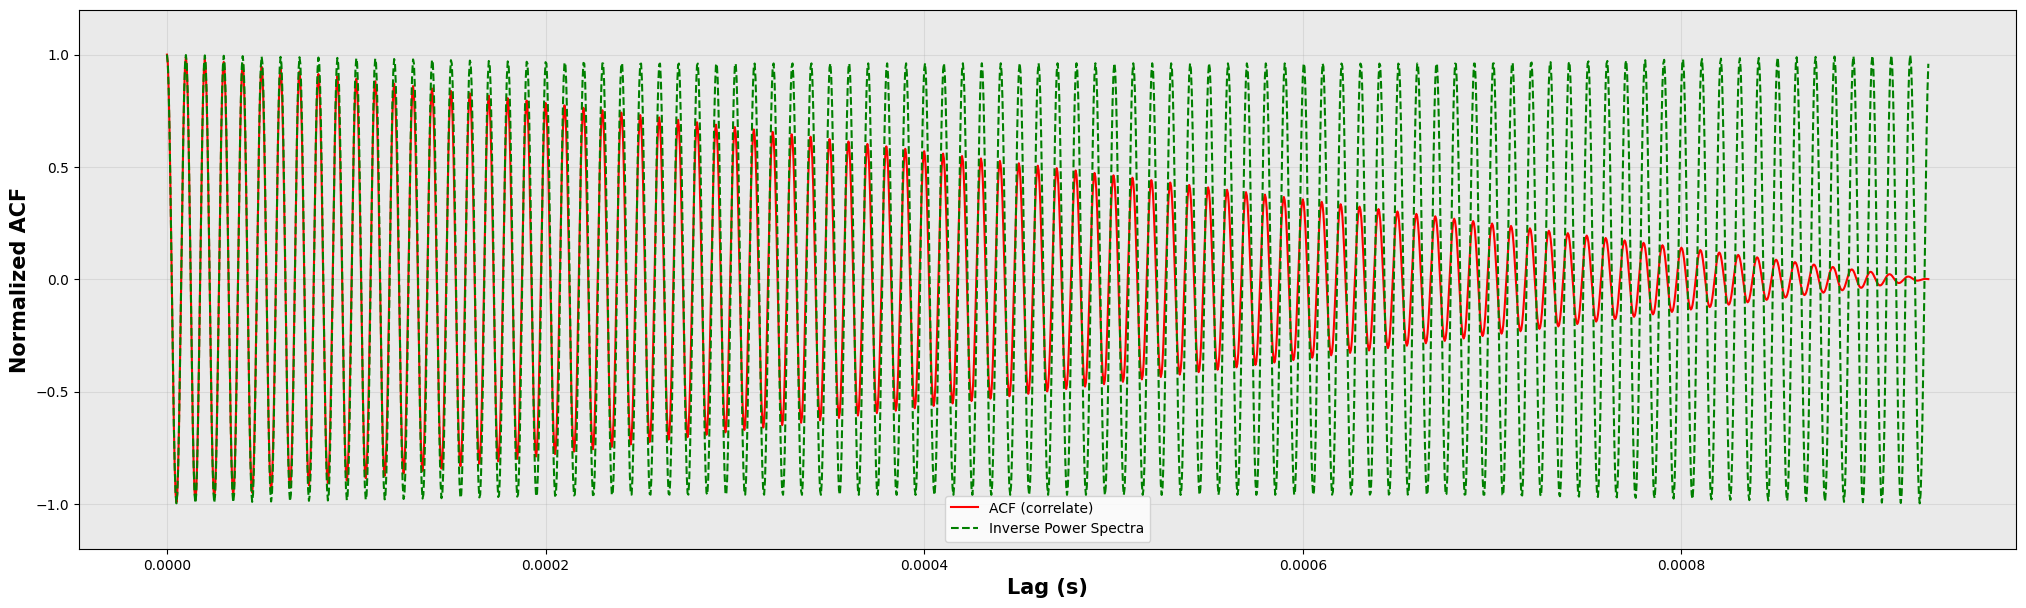

In [57]:
# Inverse Power Spectra vs. ACF

fs = 2.2e6
x = array[1]
N = len(x)
t = np.arange(N)/fs

x0 = x - np.mean(x)

acf_full = np.correlate(x0,x0, mode="full")
acf = acf_full[acf_full.size//2:]
acf /= acf[0]
tau = np.arange(len(acf)) / fs

P = np.abs(np.fft.fft(x0))**2
acf_ps = np.fft.ifft(P).real
acf_ps /= acf_ps[0]

plt.figure(figsize=[25,7])
plt.plot(tau, acf, color = "red", label = "ACF (correlate)")
plt.plot(tau, acf_ps, "--", color="green", label = "Inverse Power Spectra")
# plt.xlim(0.0000,0.0004)
plt.ylim(-1.2,1.2)
plt.xlabel("Lag (s)", weight="semibold", fontsize=15)
plt.ylabel("Normalized ACF", weight="semibold", fontsize=15)
plt.savefig("figures/ACF_vs_IPS", dpi=300)
plt.legend()
plt.gca().set_facecolor("#EAEAEA")
plt.grid(True, alpha=0.3)
plt.show()

**Figure 5**: The normalized autocorrelation function (ACF) of the measured signal as a function of time lag & the inverse power spectrum of a signal with $f_{signal}=100$ kHz and $f_{s}=2.2$ MHz. The ACF exhibits the same oscillatory structure as the inverse of the power spectrum. However, as the lag increases, the amplitude of the ACF gradually decays toward zero. This forms an envelope that reflects the signal only staying correlated with itself for a limited amount of time, which is also mirrored across the y-axis. This decay comes from a combination of variables that reduce long-lag correlations, such as finite data length, spectral leakage, and noise. 


# Spectral Leakage & Frequency Resolution

## Spectral Leakage vs. Nyquist Zones

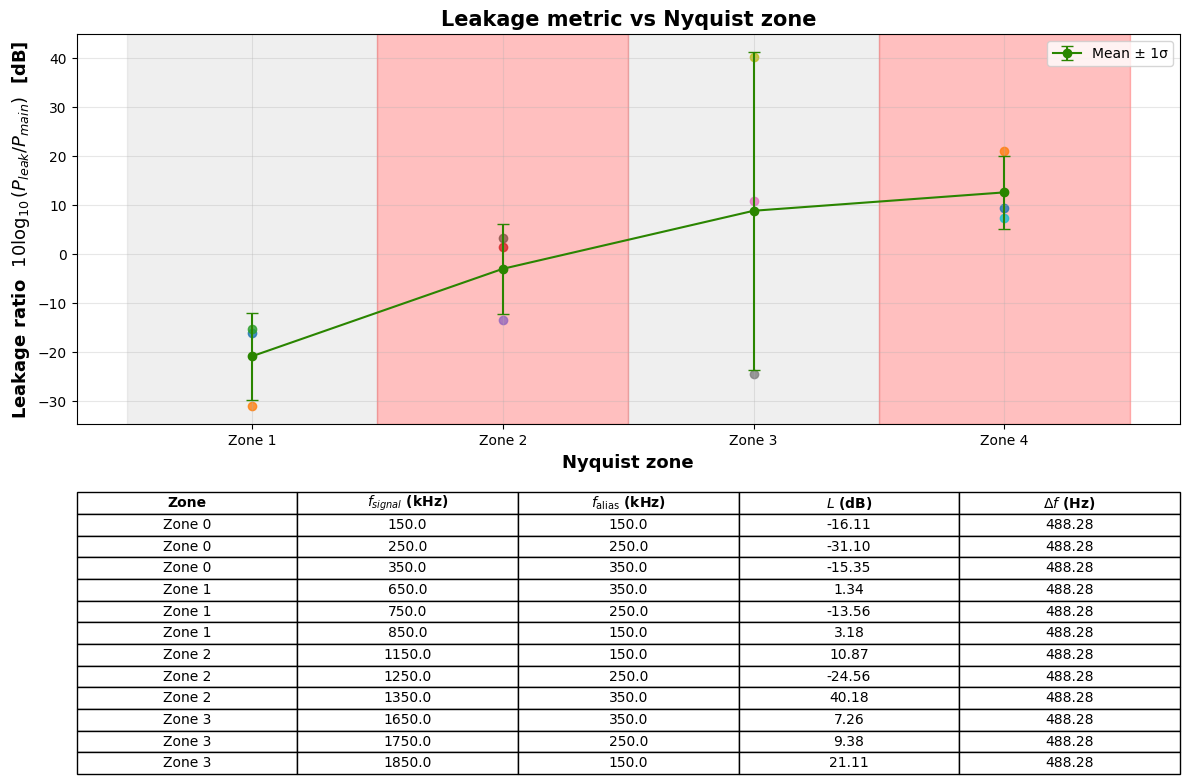

In [58]:
fs = 1e6

datasets = [
    ("Zone 0", 0.15e6, arr_z0_150[1]),
    ("Zone 0", 0.25e6, arr_z0_250[1]),
    ("Zone 0", 0.35e6, arr_z0_350[1]),

    ("Zone 1", 0.65e6, arr_z1_650[1]),
    ("Zone 1", 0.75e6, arr_z1_750[1]),
    ("Zone 1", 0.85e6, arr_z1_850[1]),

    ("Zone 2", 1.15e6, arr_z2_1150[1]),
    ("Zone 2", 1.25e6, arr_z2_1250[1]),
    ("Zone 2", 1.35e6, arr_z2_1350[1]),

    ("Zone 3", 1.65e6, arr_z3_1650[1]),
    ("Zone 3", 1.75e6, arr_z3_1750[1]),
    ("Zone 3", 1.85e6, arr_z3_1850[1]),
]


# Compute leakage for each dataset
results = []
for zone_label, f0, x in datasets:
    L_db, f_alias, df = lab.leakage_metric_db(
        x, fs, f0,
        main_lobe_bins=3,
        dc_exclude_hz=200.0
    )
    z = lab.nyquist_zone(f0, fs)
    results.append((z, zone_label, f0, f_alias, L_db, df))


# aggregate by zone
zones = sorted(set(r[0] for r in results))
zone_means = []
zone_stds = []

for z in zones:
    Ls = [r[4] for r in results if r[0] == z]
    zone_means.append(np.mean(Ls))
    zone_stds.append(np.std(Ls, ddof=1) if len(Ls) > 1 else 0.0)


# figure & subplot
fig, (ax_plot, ax_table) = plt.subplots(
    2, 1, figsize=(12, 8),
    gridspec_kw={"height_ratios": [3, 1]}
)

# shade nyquist zones (alternating)
for i, z in enumerate(zones):
    z_start = z - 0.5
    z_end   = z + 0.5

    if z % 2 != 0:
        ax_plot.axvspan(
            z_start, z_end,
            color="red", alpha=0.25,
            label="Odd Zone (Normal)" if i == 0 else None
        )
    else:
        ax_plot.axvspan(
            z_start, z_end,
            color="gray", alpha=0.12,
            label="Even Zone (Reversed)" if i == 1 else None
        )

# top plot: leakage metric vs nyquist zone
for z, zone_label, f0, f_alias, L_db, df in results:
    ax_plot.scatter(z, L_db, alpha=0.8)

ax_plot.errorbar(
    zones, zone_means, yerr=zone_stds,
    fmt='o-', capsize=4, color="#2A8500", label="Mean ± 1σ"
)

ax_plot.set_xticks(zones)
ax_plot.set_xticklabels([f"Zone {z+1}" for z in zones])
ax_plot.set_xlabel("Nyquist zone", weight='semibold', fontsize=13)
ax_plot.set_ylabel(r"Leakage ratio  $10\log_{10}(P_{leak}/P_{main})$  [dB]", weight='semibold', fontsize=13)
ax_plot.set_title("Leakage metric vs Nyquist zone", weight='semibold', fontsize=15)
ax_plot.grid(True, alpha=0.3)
ax_plot.legend()

# bottom: table
ax_table.axis("off")

col_labels = [
    "Zone",
    r"$f_{signal}$ (kHz)",
    r"$f_{\mathrm{alias}}$ (kHz)",
    r"$L$ (dB)",
    r"$\Delta f$ (Hz)"
]

table_data = [
    [
        zone_label,
        f"{f0/1e3:.1f}",
        f"{f_alias/1e3:.1f}",
        f"{L_db:.2f}",
        f"{df:.2f}"
    ]
    for z, zone_label, f0, f_alias, L_db, df in results
]

table = ax_table.table(
    cellText=table_data,
    colLabels=col_labels,
    loc="center",
    cellLoc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

# Make column headers bold
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header row
        cell.set_text_props(weight="bold")

# format
plt.tight_layout()
plt.savefig("figures/leakage_vs_nyquist_zone", dpi=300)
plt.show()


**Figure 6**: The leakage metric, given by

$$
(10\log_{10}(P_{\mathrm{leak}}/P_{\mathrm{main}}))
$$ 

being plotted as a function of Nyquist zone, along with individual measurements and the mean $\pm 1\sigma$ spread for each zone. The alternating shaded regions represent even and odd Nyquist zones. From the graph, we can see that as we go into higher Nyquist zones, the leakage metric along with its variability increases. This trend 
shows that as we move farther from DC, the signal becomes more sensitive to spectral leakage.

The table summarizes the measured parameters for all the experimental input signal frequencies tested across Nyquist Zones 1-4, listing the signal frequency $f_{signal}$, theoretically alias frequency $f_{\mathrm{alias}}$, measured leakage ratio $L$, and the frequency resolution $\Delta f$, given by

$$
\Delta f = \frac{f_s}{N}
$$

We can also identify how leakage power varies with signal frequency and Nyquist zone. This makes us come to the conclusion with strong reasoning that theoretical aliasing accurately predicts where spectral energy appears, but does not constrain how that energy is distributed in power when finite sampling is present. All of this together provides a consistent and quantitative answer to the question at the beginning: theoretical alias frequencies are fairly accurate across Nyquist zones measured, while spectral leakage effects depend on frequency resolution rather than aliasing itself.

## Spectral leakage and Convolution-Theorem Interpretation

In [59]:
arr_z0_250 = lab.load_array("data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_250kHz.npz")

data/aliasing_across_nyquist_data/Zone_2.5mHz/Z0/Z0_250kHz.npz 
 [[  -1   -1   -1 ... -128  -22  127]
 [  12 -128  -20 ... -128  -21  127]]


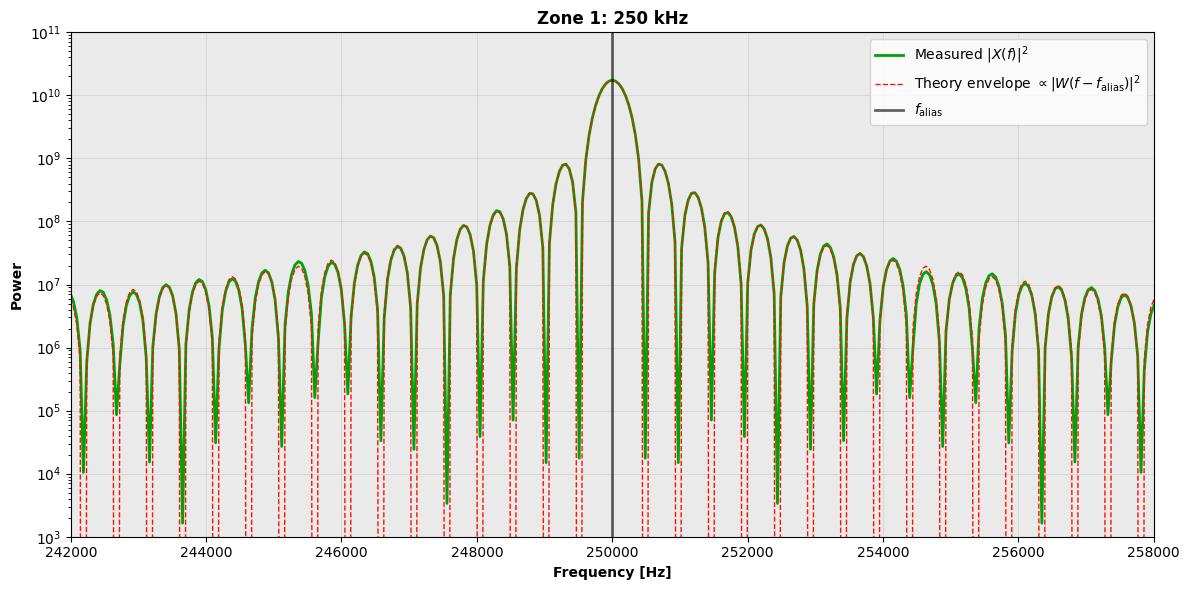

In [60]:
fs = 1e6

data_list = [
    ("Zone 1: 250 kHz", 0.25e6, arr_z0_250[1])
]

plt.figure(figsize=(12, 6))

for title, f0, x in data_list:
    x = np.asarray(x).flatten()
    N = len(x)
    T = N / fs
    t = np.arange(N) / fs
    x0 = x - np.mean(x)

    # Dense frequency grid for DFT
    Nfreq = 10 * N
    f_dense = np.linspace(-fs/2, fs/2, Nfreq, endpoint=False)

    # DFT
    f_out, X_out = lab.dft(x0, t=t, f=f_dense, vsamp=fs)

    # Power spectrum
    P = np.abs(X_out)**2

    # Alias frequency
    f_alias = lab.alias_freq(f0, fs)

    # Rectangular window theory (power envelope)
    W_shift = T * np.abs(np.sinc((f_out - f_alias) * T))

    # Scale theory envelope to match peak power (visual comparison only)
    peak_idx = np.argmin(np.abs(f_out - f_alias))
    scale = P[peak_idx] / ((W_shift[peak_idx]**2) + 1e-30)
    envP = scale * (W_shift**2)

    # Plot
    plt.plot(f_out, P, linewidth=2, color="#00A109",
             label=r"Measured $|X(f)|^2$")
    plt.plot(f_out, envP, linestyle="--", linewidth=1, color="#FF1200",
             label=r"Theory envelope $\propto |W(f-f_{\mathrm{alias}})|^2$")
    plt.axvline(f_alias, alpha=0.6, linewidth=2, color="black",
                label=r"$f_{\mathrm{alias}}$")

    plt.title(title, weight="semibold")
    plt.yscale("log")
    plt.grid(True, alpha=0.3)
    plt.xlabel("Frequency [Hz]", weight="semibold")
    plt.ylabel("Power", weight="semibold")

# Axis limits
plt.xlim(2.42e5, 2.58e5)
plt.ylim(1e3, 1e11)

plt.gca().set_facecolor("#EAEAEA")

plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig("figures/leakage_visual", dpi=300)
plt.show()


**Figure 7**: Illustrates the measured power spectrum of a 250 kHz signal in Nyquist Zone 1 using a dense-frequency discrete Fourier transform, x-axis is on a logarithmic scale to reveal power at frequencies away from the main peak. Although the input is a single-frequency sinusoid, many nonzero power peaks is observed at $\nu \neq \nu_0$, indicating spectral leakage is occuring. This phenomenon arises from the finite-length time-domain window used when sampling, which multiplies the signal by a rectangular window. The Convolution Theorem states that multiplication in the time domain corresponds to convolution in the frequency domain. This means the ideal delta function at $\nu_0$ is convolved with the Fourier transform of that window, which then produces a sinc-shaped envelope. The nearly identical agreement between the measured power spectrum and the predicted envelope given by $|W(f - f_{\mathrm{alias}})|^2$ confirms that the observed leakage can be explained by this convolution, rather than through noise or harmonics.

# Frequency Resolution

## Power Spectrum of Dual Frequency Data

In [61]:
split_freq = lab.load_array("data/fr_data/sinoffset300_305.npz")

data/fr_data/sinoffset300_305.npz 
 [[ -1  -1  -1 ...  10  12 -18]
 [ -2  20 -10 ...   0 -36  25]
 [ 23 -38   2 ...  -5  33 -17]
 ...
 [  7 -36  14 ...   5  24 -20]
 [-12  26  -5 ...   8 -12  -1]
 [ 13  -6  -8 ... -22  -3  23]]


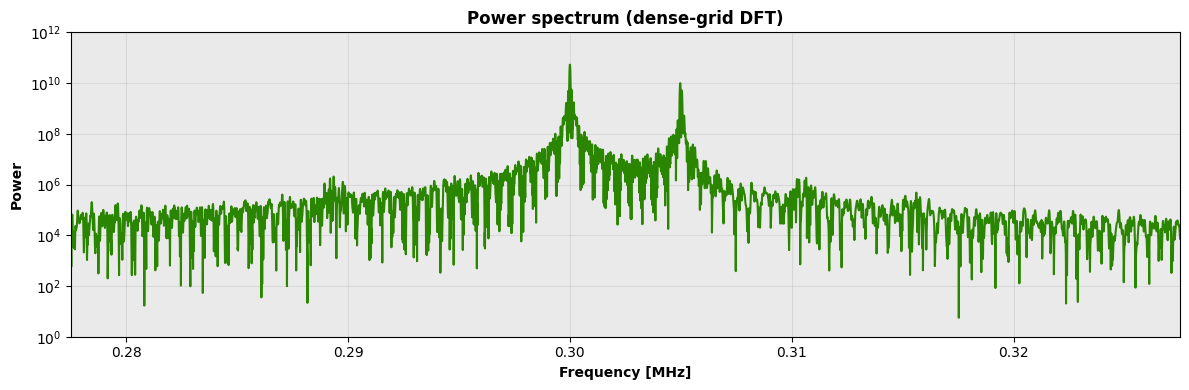

In [63]:
fs = 1e6
x = split_freq

x = np.asarray(x).flatten()
N = len(x)
t = np.arange(N) / fs
x0 = x - np.mean(x)  # remove DC

# Dense frequency grid
Nfreq = 10 * N
f_dense = np.linspace(-fs/2, fs/2, Nfreq, endpoint=False)

# DFT on dense grid
f_out, X_out = lab.dft(x0, t=t, f=f_dense, vsamp=fs)

# Power spectrum
P = np.abs(X_out)**2

# Plot
plt.figure(figsize=(12, 4))
plt.plot(f_out/1e6, P, linewidth=1.5, color = "#2A8500")
plt.gca().set_facecolor("#EAEAEA")

plt.xlabel("Frequency [MHz]", weight="semibold")
plt.ylabel("Power", weight="semibold")
plt.title("Power spectrum (dense-grid DFT)", weight="semibold")

plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.xlim(0.2775, 0.3275)
plt.ylim(1, 1e12)

plt.tight_layout()
plt.savefig("figures/frequency_resolution_power_spectrum", dpi=300)
plt.show()

**Figure 8**: The power spectrum of collected dataset of two frequencies merged (300 kHz & 305 kHz) using a power splitter. This was graphed using a dense-grid DFT, which allowed for much finer frequency sampling than the original FFT bin spacing $\,\Delta f = f_s / N\,$. The two spectral lines are clearly visible, exhibiting that the raw signals are distinctive even though their separation is smaller than the standard FFT resolution for $N$. While dense frequency graphing does not increase the true resolving power of the spectrum, it does effectively make it easier to visualize the structure of overlapping main lobes and sidelobes. Our observed peak shapes and sidelobe patterns indicate that our ability to distinguish between nearby spectral lines is limited by the finite time window applied to our data, rather than by the frequency grid we calculated itself.

## Effect of Sample Number on Frequency Resolution

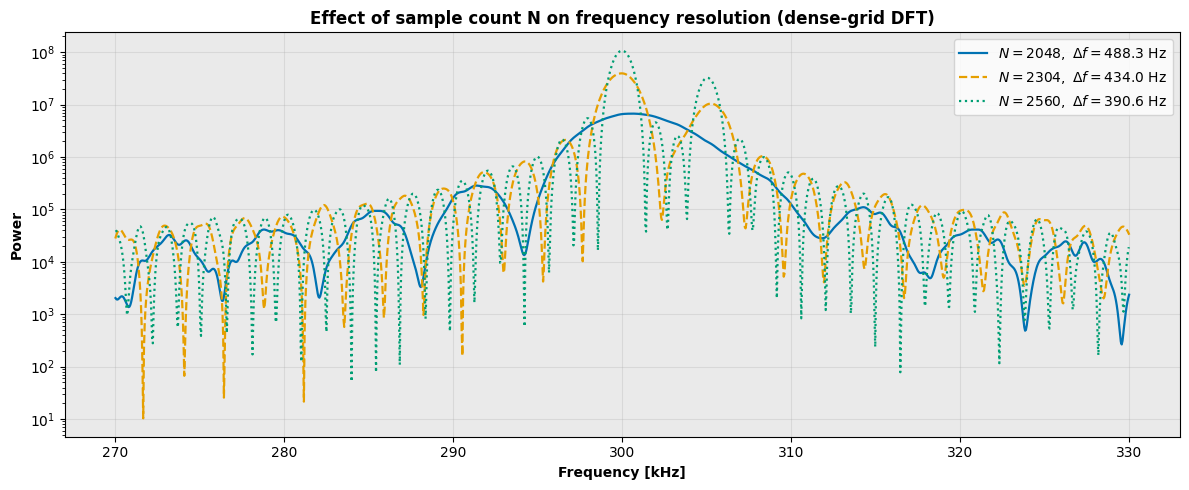

In [64]:
fs = 1e6
x_full = np.asarray(split_freq).flatten()

N_list = [2048, 2304, 2560]

f_center = 0.3e6
span = 30e3

# color + linestyle scheme
colors = ["#0072B2", "#E69F00", "#009E73"]
linestyles = ["-", "--", ":"]

plt.figure(figsize=(12, 5))
plt.gca().set_facecolor("#EAEAEA")

for i, N in enumerate(N_list):
    x = x_full[:N]
    t = np.arange(N) / fs
    x0 = x - np.mean(x)

    Nfreq = 10 * N
    f_dense = np.linspace(-fs/2, fs/2, Nfreq, endpoint=False)
    f_out, X_out = lab.dft(x0, t=t, f=f_dense, vsamp=fs)
    P = np.abs(X_out)**2

    m = (f_out > (f_center - span)) & (f_out < (f_center + span))

    plt.plot(
        f_out[m]/1e3,
        P[m],
        linewidth=1.6,
        color=colors[i],
        linestyle=linestyles[i],
        label=rf"$N={N},\ \Delta f = {fs/N:.1f}\ \mathrm{{Hz}}$"
    )

plt.xlabel("Frequency [kHz]", weight="semibold")
plt.ylabel("Power", weight="semibold")
plt.title("Effect of sample count N on frequency resolution (dense-grid DFT)", weight="semibold")
plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figures/sample_count_fr", dpi=300)
plt.show()

**Figure 9**: Three different sample counts $N={2048,2304,2560}$ plotted using a dense-grid DFT to visualize frequency resolution. As $N$ increases, the total observation time $(T = N / f_s)$ increases, which directly improves the frequency resolution of the Fourier transform taken. This can be observed in our graphs, since at a lower $N$ value, the two distinct peaks are merged into one hump. However, when you increase $N$, the frequency resolution improves and the two spectral peaks get more and more distinct the higher $N$ gets. This demonstrates that frequency resolution is fundamentally limited by the finite duration of the sampled signal rather than the sampling rate alone.

## Mathematical Explanation Using the Convolution Theorem

The Discrete Fourier Transform analyzes a signal measured over a finite time interval. This finite observation can be modeled in the same way as multiplying an infinite-duration signal $x(t)$ by a rectangular window $w(t)$ of duration $T$:

$$
x_{\text{meas}}(t) = x(t)\, w(t).
$$

As explained in **Figure 7**, through the Convolution Theorem, multiplying in the time-domain correlates to convolution in the frequency-domain:

$$
X_{\text{meas}}(f) = X(f) * W(f),
$$

where $X(f)$ is the spectrum of the signal and $W(f)$ is the Fourier transform of the window function. For a rectangular window, $W(f)$ is a sinc function whose spectral peak width is approximately

$$
\Delta f \sim \frac{1}{T} = \frac{f_s}{N}.
$$

This results in each spectral line in the spectrum measured being broadened into a sinc-shaped peak. When we increase $N$, the observation time $T$ also increases. This narrows the sinc spectral peak and reduces the overlap between nearby frequency peaks. The two spectral peaks must be separated by at least $\Delta f \approx f_s/N$ to be distinguishable, which led to why larger sample counts lead to improved frequency resolution.

# Properties of Noise and the Radiometer Equation

## Noise Histogram with Gaussian Fit Curve

In [65]:
noise_data = lab.load_array("data/noise_data/noisedata_real.npz")
noise_data_16k = lab.load_array("data/noise_data/noise_bpf.npz")

data/noise_data/noisedata_real.npz 
 [[-74 -87  16 ...  -9   2  10]
 [-39 -20 -28 ... -19 -26 -32]
 [ -2  -9 -19 ... -29 -14  11]
 ...
 [-15  -4  -1 ...   6 -38  -2]
 [ -1 -16 -22 ...  -1 -39  -8]
 [ -2  20 -15 ... -15  -2 -53]]
data/noise_data/noise_bpf.npz 
 [[ -1   3   1 ... -15  -3   7]
 [ 16  15  -5 ...  -1   0  15]
 [  5  21  15 ...   2  -5   3]
 ...
 [  1  -5  11 ...   1  -8  -3]
 [ -8 -16 -18 ...  -6  -6  -7]
 [ -2  -2  15 ...  -6   1  -1]]


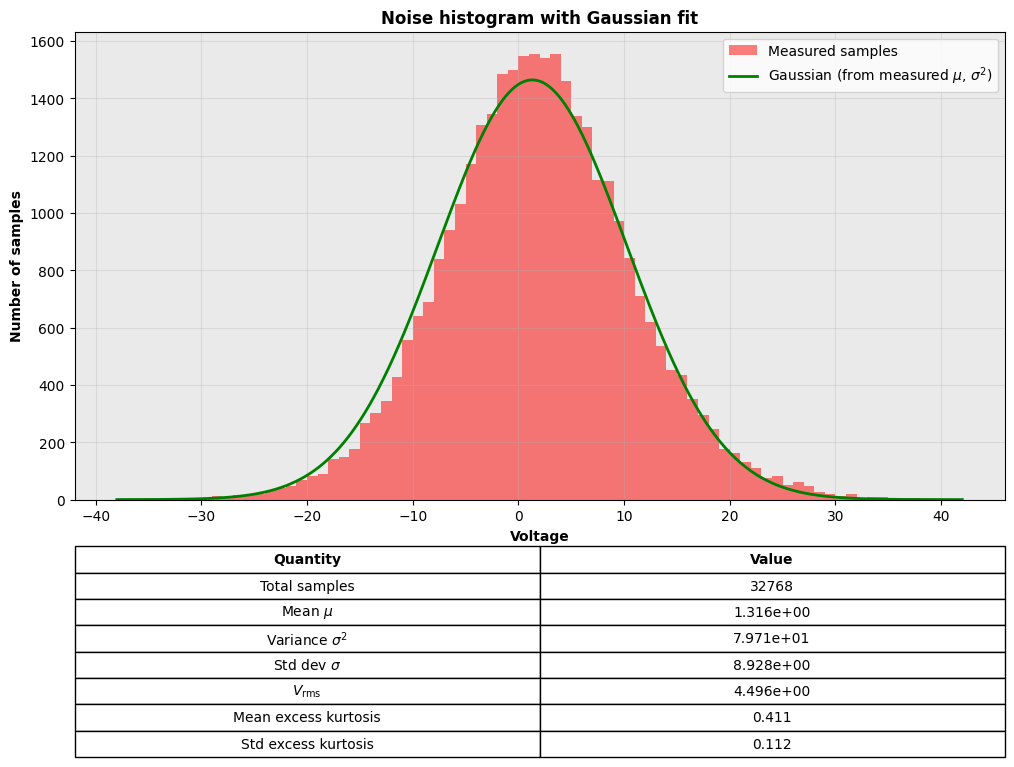

In [66]:
fs = 1e6

# input: list of blocks
# Each block's samples are noise_array[i][1]
data_blocks = [np.asarray(noise_data_16k[i]).flatten() for i in range(len(noise_data_16k))]
blocks = data_blocks[1:]  # remove first block

# concatenate for overall stats + histogram
x_all = np.concatenate(blocks)

# 1) Mean + variance
mu = np.mean(x_all)
var = np.var(x_all, ddof=1)
sigma = np.sqrt(var)
vrms = np.sqrt(np.mean(x_all**2))

# Gaussianity metrics (per block)
k_blocks = np.array([kurtosis(b, fisher=True, bias=False) for b in blocks])
s_blocks = np.array([skew(b, bias=False) for b in blocks])


# 2) Histogram (counts) + scaled Gaussian
bins = 80

counts, edges = np.histogram(x_all, bins=bins, density=False)
bin_width = edges[1] - edges[0]

# Voltage axis for smooth Gaussian
x_gauss = np.linspace(edges[0], edges[-1], 1000)

# Gaussian PDF using measured mean and variance
gauss_pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
    -0.5 * ((x_gauss - mu) / sigma) ** 2
)

# Scale PDF → expected counts per bin
gauss_counts = gauss_pdf * len(x_all) * bin_width

# Build table
table_rows = [
    ["Total samples", f"{len(x_all):d}"],
    [r"Mean $\mu$", f"{mu:.3e}"],
    [r"Variance $\sigma^2$", f"{var:.3e}"],
    [r"Std dev $\sigma$", f"{sigma:.3e}"],
    [r"$V_{\mathrm{rms}}$", f"{vrms:.3e}"],
    ["Mean excess kurtosis", f"{np.mean(k_blocks):.3f}"],
    ["Std excess kurtosis", f"{np.std(k_blocks):.3f}"],
]

# Plot + table at bottom
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(x_all, bins=bins, alpha=0.5, color="red", label="Measured samples")
ax.plot(x_gauss, gauss_counts, linewidth=2, color="green",
        label=r"Gaussian (from measured $\mu$, $\sigma^2$)")

ax.set_xlabel("Voltage", weight="semibold")
ax.set_ylabel("Number of samples", weight="semibold")
ax.set_title("Noise histogram with Gaussian fit", weight="semibold")
ax.set_facecolor("#EAEAEA")
ax.grid(True, alpha=0.3)
ax.legend()

# Add table below plot
table = ax.table(
    cellText=table_rows,
    colLabels=["Quantity", "Value"],
    cellLoc="center",
    loc="bottom",
    bbox=[0.0, -0.55, 1.0, 0.45]  # [left, bottom, width, height]
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.1, 0.1)

# Make room for table
plt.subplots_adjust(bottom=0.1)


# Make column headers bold
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header row
        cell.set_text_props(weight="bold")

plt.savefig("figures/noise_histogram_gaussian_fit.png", dpi=300, bbox_inches="tight")
plt.show()


**Figure 10**: The distribution of measured of samples to the voltage they were measured at in the spectrum. The table summarizes the statistical properties of the measured noise using 15 blocks of 2048 samples each, for a total of 30,720 samples. The measured mean of $\mu \approx 1.316$ is small compared to the overall noise scale, indicating that there is only a minor DC offset. The variance $\sigma^2 \approx 79.71$ (corresponding to $\sigma \approx 8.928$) and $V_{\mathrm{rms}} \approx 4.496$ quantify the strength of the consistent fluctuations across blocks, which support our assumption of this showcasing stationary noise.

The histogram’s close alignment with a Gaussian fit curve demonstrates this behavior. The positive mean excess kurtosis of $\sim 0.411$ 
means that the distribution has slightly heavier trails than the ideal Gaussian distribution, which are also consistent with the small deviations observed in the histogram tails. The small standard deviation of the excess kurtosis across blocks ($\sim 0.112$) suggests that these uncharacteristic features of the Gaussian are systematic rather than due to a single outlier block. Overall, the statistics of the measured data to the theoretical curve confirm some Gaussian noise with mild higher-order structure, which we should expect when collecting real measurements with finite bandwidth and digitization effects.

## Power spectrum for Three block & Average across all Blocks

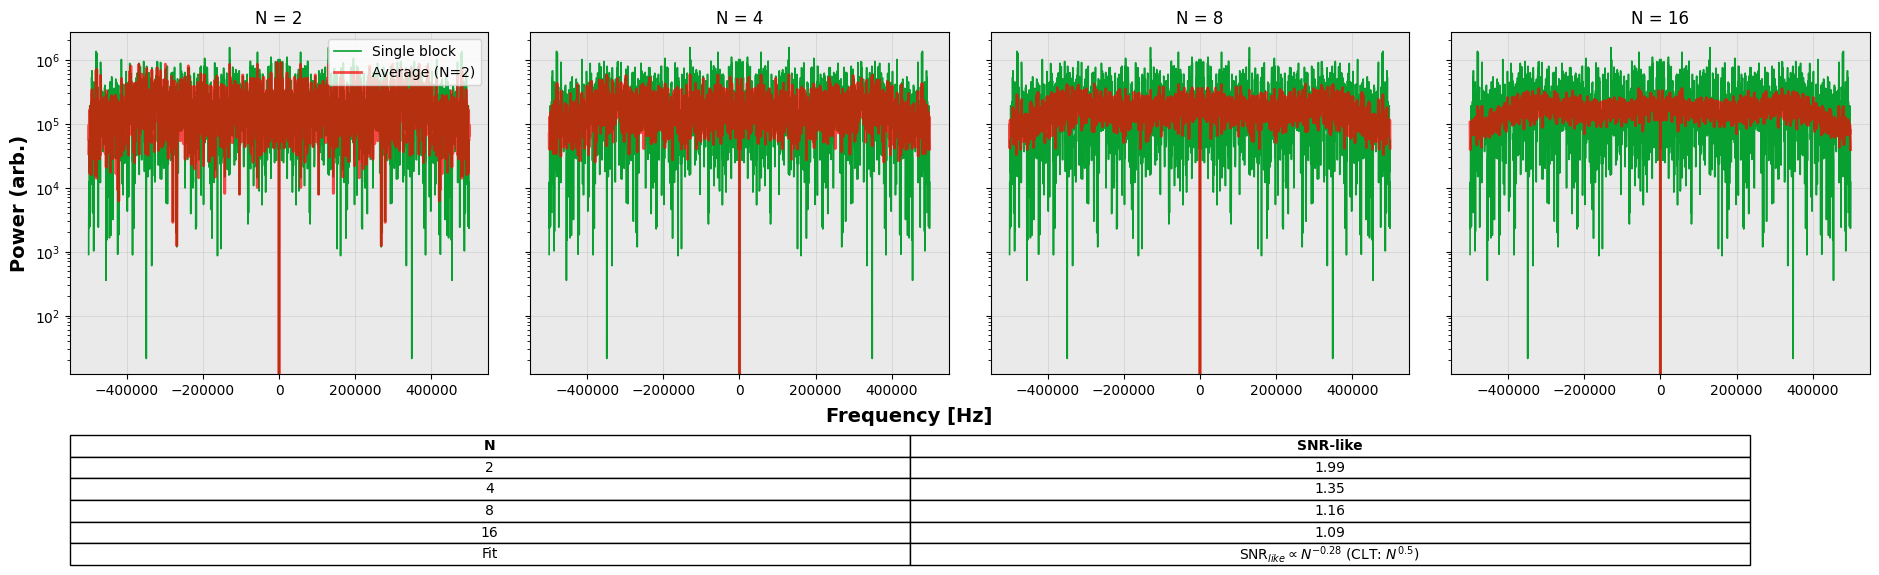

In [67]:
f, P0, _ = lab.power_spectrum_ifft(blocks[0], fs)
P_blocks = np.vstack([lab.power_spectrum_ifft(b, fs)[1] for b in blocks])
P_avg_all = np.mean(P_blocks, axis=0)

# Compare single block vs avg(N) in separate subplots
Ns = [2, 4, 8, 16]
Ns = [N for N in Ns if N <= len(blocks)]

single = P_blocks[0]
mask = np.abs(f) > 0.02 * fs  # avoid tiny region near DC

ncols = len(Ns)
fig, axes = plt.subplots(1, ncols, figsize=(5*ncols, 6),
                         sharex=True, sharey=True)

if ncols == 1:
    axes = [axes]

snr_like = {}

for ax, N in zip(axes, Ns):
    avgN = np.mean(P_blocks[:N], axis=0)
    ax.set_facecolor("#EAEAEA")

    ax.plot(f, single, linewidth=1.2, color="#08A131", label="Single block")
    ax.plot(f, avgN, linewidth=2.0, color="red", alpha=0.7, label=f"Average (N={N})")

    ax.set_yscale("log")
    ax.grid(True, alpha=0.3)
    ax.set_title(f"N = {N}")

    stdN = np.std(P_blocks[:N, mask], axis=0).mean()
    snr_like[N] = np.mean(avgN[mask]) / (stdN + 1e-30)

# Axis labels (y only on left, x only on center)
axes[0].set_ylabel("Power (arb.)", weight="semibold", fontsize=14)

fig.text(0.5, 0.26, "Frequency [Hz]",
         ha="center", va="center",
         weight="semibold", fontsize=14)

axes[0].legend(loc="upper right")

# Build table data
fit_text = "N/A"
if len(Ns) >= 2:
    logN = np.log(np.array(Ns, dtype=float))
    logS = np.log(np.array([snr_like[N] for N in Ns], dtype=float))
    x_fit, _ = np.polyfit(logN, logS, 1)
    fit_text = rf"SNR$_{{like}} \propto N^{{{x_fit:.2f}}}$ (CLT: $N^{{0.5}}$)"

table_rows = [[f"{N}", f"{snr_like[N]:.3g}"] for N in Ns]
table_rows.append(["Fit", fit_text])

# Add table spanning entire bottom
# Full-width table at bottom
table_ax = fig.add_axes([0.08, 0.02, 0.84, 0.20])
table_ax.axis("off")

table = table_ax.table(
    cellText=table_rows,
    colLabels=["N", "SNR-like"],
    cellLoc="center",
    loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.3)

# Make room for the table
plt.subplots_adjust(
    top=0.9,
    left=0.08,
    right=0.98,
    bottom=0.33,
    wspace=0.1
)

# Make column headers bold
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header row
        cell.set_text_props(weight="bold")

plt.savefig("figures/single_block_noise_vs_avg.png", dpi=300, bbox_inches="tight")
plt.show()

**Figure 11**: Three plots comparing a single-block noise power spectrum with averages formed from $N=2$, $4$, $8$, and $16$ blocks. We can see that as $N$ increases, the averaged spectrum becomes more defined, visually smoother, and fluctuations progressively get more suppressed while retaining the overall broadband spectral shape. This behavior shows that individual spectra are dominated by random variance, but averaging it out reduces these fluctuations and yields a more stable estimate of the power spectral density.

The table gives us a quantified value of this smoothing effect by comparing the mean power to the residual scatter. Although this is clear in the plots, this table actually shows that the fitted scaling $\text{SNR}_{\text{like}} \sim N^{-0.28}$ deviates from the ideal Central Limit Theorem, expectation of $\sim N^{0.5}$. This differences most likely comes from the frequency correlations introduced by the FFT and the finite number of blocks available. Overall, the visual and statiscial results are good examples that demonstrate that spectral averaging improves measurement stability and reduces noise-induced variance.

## Radiometer Equation and Noise Averaging

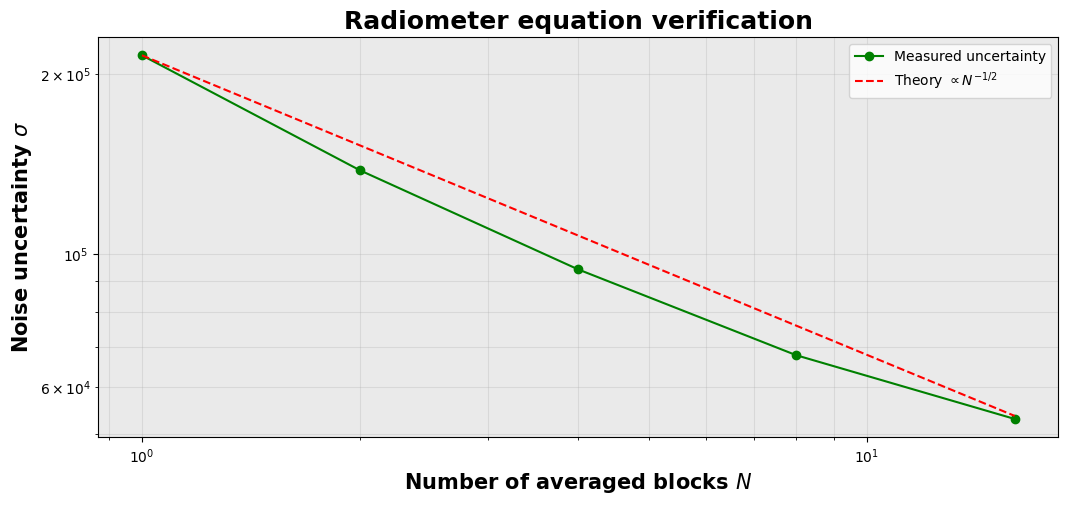

In [68]:
# Number of blocks to average
Ns = np.array([1, 2, 4, 8, 16])
Ns = Ns[Ns <= len(P_blocks)]

sigma_meas = []

# Choose frequency region away from DC / strong tones
mask = (np.abs(f) > 0.05 * fs)

for N in Ns:
    avg_spec = np.mean(P_blocks[:N], axis=0)
    sigma = np.std(avg_spec[mask])
    sigma_meas.append(sigma)

sigma_meas = np.array(sigma_meas)

# Reference radiometer scaling
sigma_ref = sigma_meas[0] * (Ns / Ns[0])**(-0.5)

# Plot
plt.figure(figsize=(12, 5))
plt.gca().set_facecolor("#EAEAEA")
plt.loglog(Ns, sigma_meas, 'o-', color = "green", label="Measured uncertainty")
plt.loglog(Ns, sigma_ref, '--', color = "red", label=r"Theory $\propto N^{-1/2}$")

plt.xlabel("Number of averaged blocks $N$", weight="semibold", fontsize=15)
plt.ylabel(r"Noise uncertainty $\sigma$", weight="semibold", fontsize=15)
plt.title("Radiometer equation verification", weight="semibold", fontsize=18)
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.subplots_adjust(top=0.9, hspace=0.1, left = 0.1, bottom=0.1)
plt.savefig("figures/Radiometer_equation_verification", dpi=300)
plt.show()

**Figure 12**: The measured noise uncertainty $\sigma$ as a function of the number of averaged blocks $N$ compared to the radiometer noise uncertainty.

The radiometer equation describes how the uncertainty in a noise measurement decreases as independent samples are averaged. For a system with noise temperature $T_{\mathrm{sys}}$, bandwidth $B$, and integration time $t$, the expected uncertainty is given by
$$
\sigma_T = \frac{T_{\mathrm{sys}}}{\sqrt{Bt}} .
$$
This scaling factor follows directly from the Central Limit Theorem, which predicts that fluctuations decrease as $N^{-1/2}$ when $N$ independent samples are averaged.

**Figure 12** shows this behaviors experimentally by measuring the standard deviation of the noise power spectrum of our data as we increase the number of data blocks that are averaged. The measured uncertainty follows the theoretical trend $(\sigma \propto N^{-1/2})$, which confirms that the noise is dominated by stochastic fluctuations rather than being a systematic effect. This close correlation shows that block averaging effectively increases the integration time and can improve sensitivity in alignment with the radiometer equation.

### SDR Bandpass Response

The SDR bandpass filter response was shown through the power spectra and noise measurements above. We can observe that the effective bandpass of the SDR is shown through the limited frequency range over which the noise and signal power appear, which set up the noise bandwidth for the radiometer equation.

# The Double Sideband (DSB) Mixer

In [69]:
dsb_data = lab.load_array("data/dsb_data/fir_300_285_1.npz")

data/dsb_data/fir_300_285_1.npz 
 [[  0   0  -1 ...  15  30 -71]
 [ 13  66 -41 ...  -7 -61 -20]
 [-56 -50 -45 ...  23  -9   8]
 ...
 [  1 -37 -40 ...  13 -12  33]
 [-13  14  11 ... -70   3  75]
 [-32 -76 100 ... -12 -31 -19]]


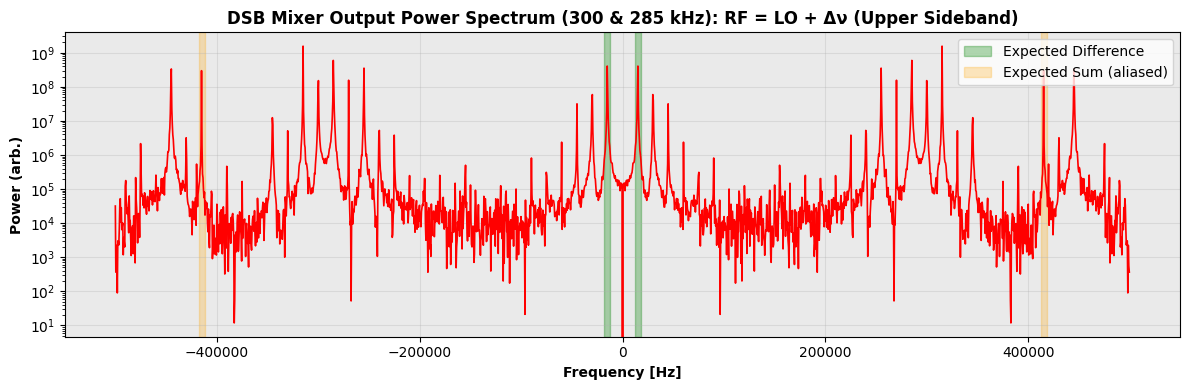

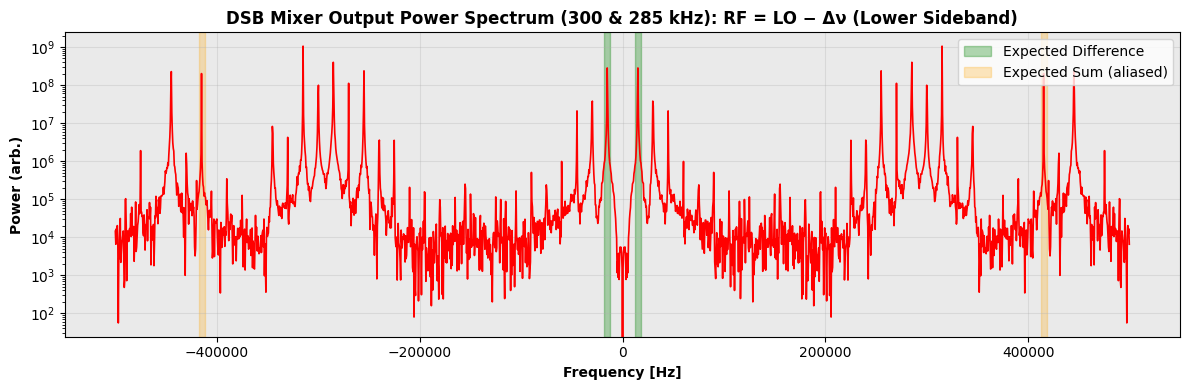

In [70]:
fs = 1e6

# expected frequencies (Hz)
f1 = 300e3
f2 = 285e3

# Expected mixer products
f_if = abs(f1 - f2)          # 15 kHz (difference / IF)
f_sum = f1 + f2              # 585 kHz (sum, above Nyquist)
f_sum_alias = abs(fs - f_sum)  # 415 kHz (aliased sum)

# Shading half-width (a few FFT bins)
shade_hz = 3e3  # +/- 3 kHz

# 0) Load all blocks from dsb_data
data_blocks = [np.asarray(dsb_data[i]).flatten() for i in range(len(dsb_data))]
waves = data_blocks[1:]  # remove first block

# 1) Compute spectra
spectra = []
for x in waves:
    f, P, X = lab.power_spectrum_ifft(x, fs)
    spectra.append((f, P, X))

idx_usb = 0
idx_lsb = 1

def plot_spectrum(i, title, xlim=None):
    f, P, _ = spectra[i]

    plt.figure(figsize=(12, 4))
    plt.plot(f, P, color="red", linewidth=1.2)
    plt.yscale("log")
    plt.xlabel("Frequency [Hz]", weight="semibold")
    plt.ylabel("Power (arb.)", weight="semibold")
    plt.title(title, weight="semibold")
    plt.grid(True, alpha=0.3)

    # shaded expected regions
    # Difference
    plt.axvspan(f_if - shade_hz, f_if + shade_hz,
                color="green", alpha=0.3,
                label=r"Expected Difference")
    plt.axvspan(-f_if - shade_hz, -f_if + shade_hz,
                color="green", alpha=0.3)

    # Sum
    plt.axvspan(f_sum_alias - shade_hz, f_sum_alias + shade_hz,
                color="orange", alpha=0.25,
                label=r"Expected Sum (aliased)")
    plt.axvspan(-f_sum_alias - shade_hz, -f_sum_alias + shade_hz,
                color="orange", alpha=0.25)

    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])

    plt.gca().set_facecolor("#EAEAEA")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig(f"figures/{title}.png", dpi=300)
    plt.show()

plot_spectrum(idx_usb, "DSB Mixer Output Power Spectrum (300 & 285 kHz): RF = LO + Δν (Upper Sideband)")
plot_spectrum(idx_lsb, "DSB Mixer Output Power Spectrum (300 & 285 kHz): RF = LO − Δν (Lower Sideband)")

**Figure 13**: The Double-Side Band mixer output spectra for upper and lower sideband cases. The power spectra for show both the expected frequency components, shaded red & orange, produced through mixing. The other peaks in the power spectra are most likely due to harmonics of the RF or LO or higher-order nonlinear mixing.

### Mathematical Reasoning

In a double sideband (DSB) mixer, the local oscillator (LO) is a real sinusoid,
$
v_{\mathrm{LO}}(t) = A\cos(\omega_{\mathrm{LO}} t),
$
and the RF input is also a real sinusoid,
$
v_{\mathrm{RF}}(t) = B\cos(\omega_{\mathrm{RF}} t).
$

The mixer output is the product of the two signals:
$$
v_{\mathrm{mix}}(t) = v_{\mathrm{RF}}(t)\,v_{\mathrm{LO}}(t).
$$

Using the cosine product identity, this becomes
$$
v_{\mathrm{mix}}(t)
= \frac{AB}{2}\left[
\cos\!\big((\omega_{\mathrm{RF}}-\omega_{\mathrm{LO}})t\big)
+ \cos\!\big((\omega_{\mathrm{RF}}+\omega_{\mathrm{LO}})t\big)
\right].
$$

This inevitably produces two frequencies components:
- a difference (intermediate) frequency at $|\omega_{\mathrm{RF}} - \omega_{\mathrm{LO}}|$, and  
- a sum frequency at $\omega_{\mathrm{RF}} + \omega_{\mathrm{LO}}$.

These are visible in **Figure 13**. However, for the sum frequency, since it does not meet the Nyquist Criterion, the signal actually folds back from $585$ kHz to $415$ kHz. From our mathematical calculations, we know that the information stored in the lower and upper sidebands are the same, hence why they look nearly identical.

### Heterodyne Process

The heterodyne process in this spectrum shows how being inputted a high-frequency RF signal, it can be translated down to a lower-intermediate frequency (IF) by mixing it with a oscillator. This process preserves the spectral structure of the original signal while shifting it into a bandwidth that can be sampled efficiently and analyzed. This is important for radio astronomy as we are able to use this process to observe weak cosmic signals that are usually inaccessible to be observed at a high spectral resolution.

# The Single-Sideband (SSB) Mixer

In [71]:
ssb_data_CH1 = lab.load_array("data/ssb_data/ssb_27MHZ_CH1_0.npz")
ssb_data_CH2 = lab.load_array("data/ssb_data/ssb_27MHZ_CH2_0.npz")

data/ssb_data/ssb_27MHZ_CH1_0.npz 
 [[-1  1 -1 ...  4 -4 -3]
 [ 4 10  2 ...  5  5 -2]
 [-5  2  5 ...  5  0  1]
 ...
 [ 2  5  2 ...  1  4  3]
 [ 3  3 -2 ...  6  3  2]
 [ 2 -3 -1 ...  3  2  6]]
data/ssb_data/ssb_27MHZ_CH2_0.npz 
 [[  2 -11  -2 ...   1   3  -3]
 [  3  22   2 ...   2  -5  12]
 [ 12  -5   3 ...   1  12   3]
 ...
 [  0   1  -3 ...   3   0   7]
 [ -2   1  10 ...   1   2  -2]
 [  2   3  -6 ...  -3  -8   4]]


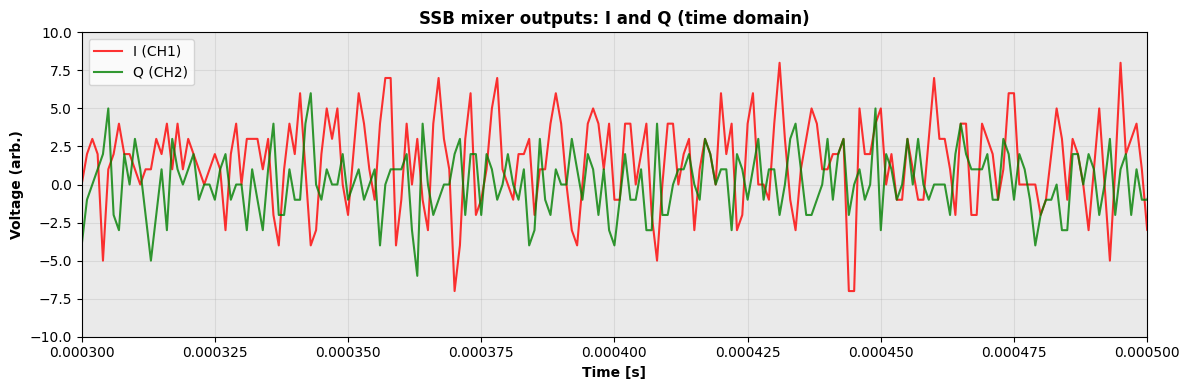

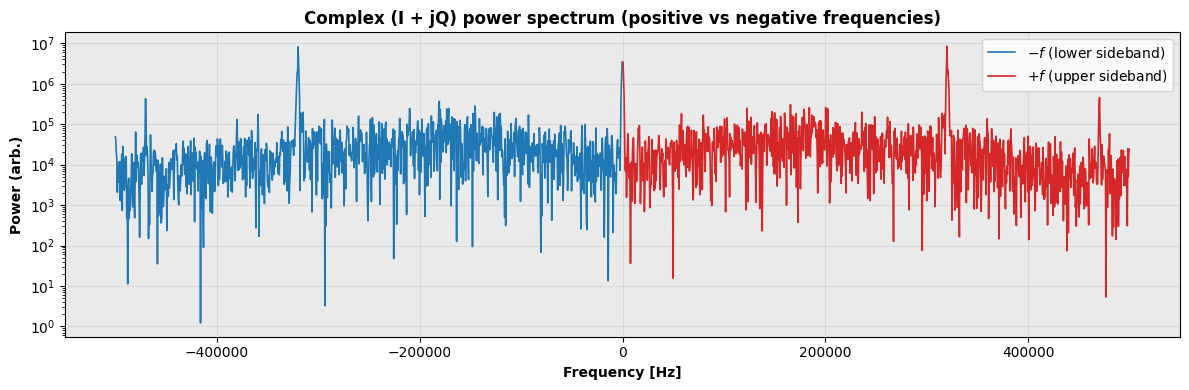

In [72]:
fs = 1e6

# Your oscilloscope channels:
I_blocks = ssb_data_CH1   # "Real" / I
Q_blocks = ssb_data_CH2   # "Imag" / Q

# pick which capture/block to analyze
k = 7
I = np.asarray(I_blocks[k]).flatten()
Q = np.asarray(Q_blocks[k]).flatten()
N = min(len(I), len(Q))
I, Q = I[:N], Q[:N]

t = np.arange(N) / fs

# 1) Time series + I/Q phase difference (simple)
phi_I = np.unwrap(np.angle(np.fft.fft(I - np.mean(I))))
phi_Q = np.unwrap(np.angle(np.fft.fft(Q - np.mean(Q))))

plt.figure(figsize=(12, 4))
plt.plot(t, I, color="red", label="I (CH1)", alpha=0.8)
plt.plot(t, Q, color="green", label="Q (CH2)", alpha=0.8)
plt.xlim(0, 2000/fs)  # show first ~2000 samples (adjust)
plt.xlabel("Time [s]", weight="semibold")
plt.ylabel("Voltage (arb.)", weight="semibold")
plt.title("SSB mixer outputs: I and Q (time domain)", weight="semibold")
plt.grid(True, alpha=0.3)
plt.xlim(0.0003,0.0005)
plt.gca().set_facecolor("#EAEAEA")
plt.ylim(-10,10)
plt.legend()
plt.tight_layout()
plt.savefig("figures/SSB_mixer_outputs", dpi=300)
plt.show()

# 2) Complex IQ + power spectrum (distinguish +f vs -f)
z = (I - np.mean(I)) + 1j*(Q - np.mean(Q))
Z = np.fft.fftshift(np.fft.fft(z))
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))
P = np.abs(Z)**2

# Masks for positive and negative frequencies
pos = f > 0
neg = f < 0

plt.figure(figsize=(12, 4))

# Plot negative frequencies
plt.plot(f[neg], P[neg],
         color="#1f77b4", linewidth=1.2, label=r"$-f$ (lower sideband)")

# Plot positive frequencies
plt.plot(f[pos], P[pos],
         color="#d62728", linewidth=1.2, label=r"$+f$ (upper sideband)")

plt.yscale("log")
plt.xlabel("Frequency [Hz]", weight="semibold")
plt.ylabel("Power (arb.)", weight="semibold")
plt.title("Complex (I + jQ) power spectrum (positive vs negative frequencies)", weight="semibold")
plt.grid(True, alpha=0.3)
plt.gca().set_facecolor("#EAEAEA")
plt.legend()
plt.tight_layout()
plt.savefig("figures/Complex_SSB_power_spectrum_colored", dpi=300)
plt.show()

**Figure 14**: The top panel shows the time-domain in-phase (I) and quadrature (Q) outputs of a single sideband (SSB) mixer, which are ~$90^\circ$ out of phase. The bottom panel shows the power spectrum of this complex signal $(I + jQ)$, where the positive and negative frequencies are seperated by color. Both the upper and lower sideband are present as we can observe both the $+f$ or $-f$ peaks.

In **Figure 13**, the RF signal was mixed with a real oscillator, which produced symmetric sum and differences. In contrast, the SSB mixer uses quadrature mixing, which ends up suppressing one sideband by canceling either the $e^{+i\Delta\omega t}$ or $e^{-i\Delta\omega t}$ term. This results in the complex Fourier transform being able to separate the positive and negative frequncies and allowing us to directly measure the sign of $\Delta\nu$.